<a href="https://colab.research.google.com/github/snehavyshnavi/Deep-Learning/blob/main/DL_Program3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train) , (x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(x_train.shape[0],28*28).astype('float32')/255.0
x_test = x_test.reshape(x_test.shape[0],28*28).astype('float32')/255.0

y_train_one_hot=to_categorical(y_train, num_classes=10)
y_test_one_hot=to_categorical(y_test, num_classes=10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(units=128, activation='relu',input_shape=(784,)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train_one_hot,epochs=10, batch_size=32)
evaluation_results= model.evaluate(x_test, y_test_one_hot)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8835 - loss: 0.4087
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9687 - loss: 0.1024
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9793 - loss: 0.0630
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9856 - loss: 0.0474
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9892 - loss: 0.0357
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9892 - loss: 0.0318
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9909 - loss: 0.0253
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9928 - loss: 0.0217
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9945 - loss: 0.0168
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9954 - loss: 0.0139
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9732 - loss: 0.1177


In [ ]:
print(f"Test Loss: {evaluation_results[0]}")
print(f"Test Accuracy: {evaluation_results[1]}")

Test Loss: 0.10252875834703445
Test Accuracy: 0.9767000079154968


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


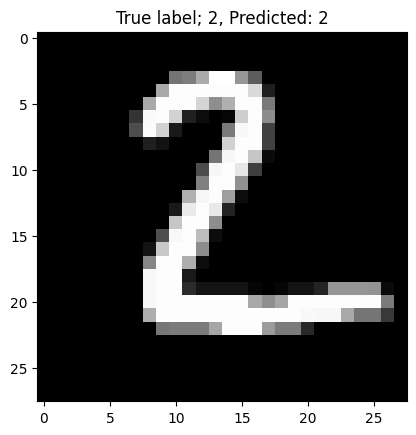

Prediction is correct!


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
image_index=1
test_image = x_test[image_index].reshape(1, 784)
true_label = y_test[image_index]


prediction= model.predict(test_image)
predicted_class= np.argmax(prediction)


plt.imshow(x_test[image_index].reshape(28, 28), cmap='gray')
plt.title(f"True label; {true_label}, Predicted: {predicted_class}")
plt.show()

if predicted_class == true_label:
  print("Prediction is correct!")
else:
  print("Prediction is incorrect.")
